In [1]:
!pip install torch_geometric
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-2.0.0+cpu.html


  Obtaining dependency information for torch_geometric from https://files.pythonhosted.org/packages/03/9f/157e913626c1acfb3b19ce000b1a6e4e4fb177c0bc0ea0c67ca5bd714b5a/torch_geometric-2.6.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/63.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/63.1 kB ? eta -:--:--
     ------------ ------------------------- 20.5/63.1 kB 217.9 kB/s eta 0:00:01
     ------------------------------ ------- 51.2/63.1 kB 375.8 kB/s eta 0:00:01
     -------------------------------------- 63.1/63.1 kB 422.6 kB/s eta 0:00:00
  Obtaining dependency information for aiohttp from https://files.pythonhosted.org/packages/b7/0b/607c98bff1d07bb21e0c39e7711108ef9ff4f2a361a3ec1ce8dce93623a5/aiohttp-3.11.7-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for fsspec from https://files.pythonhosted.org/packages/c6/b2/454d6e7f0158951d8a78c2e1eb4f69ae81beb8dca5fee9809c6c99e9d0d0/fsspec-2024.10.0-py3-none-any.whl

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python312\\Scripts\\tqdm.exe' -> 'C:\\Python312\\Scripts\\tqdm.exe.deleteme'


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "C:\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "C:\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py"

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html
     ---------------------------------------- 0.0/108.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/108.0 kB ? eta -:--:--
     ---------- -------------------------- 30.7/108.0 kB 262.6 kB/s eta 0:00:01
     --------------------- --------------- 61.4/108.0 kB 409.6 kB/s eta 0:00:01
     ------------------------------------ 108.0/108.0 kB 627.0 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import matplotlib.ticker as ticker

uploaded=files.upload()
data=pd.read_excel(next(iter(uploaded)))

#data cleaning
data['Date']=pd.to_datetime(data['Date'])


sns.set(style='whitegrid', palette='muted')
plt.rcParams.update({'figure.autolayout': True})



monthly_counts=data.resample('M', on='Date').size()

plt.figure(figsize=(12, 5))
plt.plot(monthly_counts.index,monthly_counts.values,marker='o',markersize=6,color='teal',linewidth=2)
plt.title('Number of Incidents Over Time (Monthly)',fontsize=16,pad=15)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Number of Incidents',fontsize=12)
plt.xticks(rotation=45,ha='right')
plt.grid(True, linestyle='--',alpha=0.7)
plt.show()


attack_counts=data['Type'].value_counts().head(5)


plt.figure(figsize=(8, 5))
sns.barplot(x=attack_counts.values,y=attack_counts.index,palette='muted')
plt.title('Dominant Attack Types',fontsize=16,pad=15)
plt.xlabel('Number of Incidents',fontsize=12)
plt.show()




fig, ax=plt.subplots(figsize=(10, 6))
industry_counts=data['Industry'].value_counts().head(10)

sns.barplot(x=industry_counts.values,y=industry_counts.index,ax=ax,palette='muted')
ax.set_title('Top 10 Most Affected Industries',fontsize=16,pad=15)
ax.set_xlabel('Number of Incidents',fontsize=12)


plt.show()



fig, ax=plt.subplots(figsize=(10, 6))
location_counts=data['Location'].value_counts().head(10)

sns.barplot(x=location_counts.values,y=location_counts.index,ax=ax,palette='coolwarm')
ax.set_title('Top 10 Countries with Most Incidents',fontsize=16,pad=15)
ax.set_xlabel('Number of Incidents',fontsize=12)


plt.show()



pivot_table=data.pivot_table(
    index='Industry',columns='Type',aggfunc='size',fill_value=0
)


pivot_table=pivot_table.loc[pivot_table.sum(axis=1).sort_values(ascending=False).index]
pivot_table=pivot_table[pivot_table.sum().sort_values(ascending=False).index]


plt.figure(figsize=(16, 10))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Number of Incidents'}
)
plt.title('Types of Attacks by Industry',fontsize=18,pad=15)
plt.xlabel('Attack Type',fontsize=14)
plt.ylabel('Industry',fontsize=14)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)


plt.subplots_adjust(top=2.0,bottom=0.1,left=0.1,right=0.9,hspace=10.0)

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'pandas'

In [ ]:
!pip install pmdarima

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima



data['Date']=pd.to_datetime(data['Date'], errors='coerce')
data.dropna(subset=['Date'],inplace=True)
data['YearMonth']=data['Date'].dt.to_period('M')
le_type=LabelEncoder()
le_subtype=LabelEncoder()
data['Type_encoded']=le_type.fit_transform(data['Type'])
data['Sub-Type_encoded']=le_subtype.fit_transform(data['Sub-Type'])


grouped_data=data.groupby('YearMonth').agg({
    'Type':lambda x: Counter(x).most_common(1)[0][0],
    'Sub-Type':lambda x: Counter(x).most_common(1)[0][0],
    'Date':'count'
}).reset_index()

grouped_data.rename(columns={'Date':'Number of Incidents'},inplace=True)
grouped_data['YearMonth_encoded'] = pd.to_datetime(grouped_data['YearMonth'].astype(str)).astype(int) / 10**9


scaler=StandardScaler()
grouped_data['YearMonth_encoded_scaled']=scaler.fit_transform(grouped_data[['YearMonth_encoded']])
grouped_data['Incidents_scaled']=scaler.fit_transform(grouped_data[['Number of Incidents']])

grouped_data['Lag_1']=grouped_data['Incidents_scaled'].shift(1).fillna(0)
grouped_data['Lag_2']=grouped_data['Incidents_scaled'].shift(2).fillna(0)


node_features=grouped_data[['YearMonth_encoded_scaled','Incidents_scaled','Lag_1','Lag_2']].values
labels=grouped_data['Incidents_scaled'].values

node_features_tensor=torch.tensor(node_features,dtype=torch.float)
labels_tensor=torch.tensor(labels,dtype=torch.float)
#train-test split
train_features,test_features,train_labels,test_labels=train_test_split(
    node_features_tensor,labels_tensor,test_size=0.2,shuffle=False)

#gcn class
class GCN(nn.Module):
    def __init__(self,in_channels,out_channels):
        super(GCN,self).__init__()
        self.conv1=GCNConv(in_channels,128)
        self.conv2=GCNConv(128,64)
        self.conv3=GCNConv(64,out_channels)
        self.dropout=nn.Dropout(0.5)
        self.batch_norm=nn.BatchNorm1d(64)

    def forward(self,x,edge_index):
        x=self.conv1(x,edge_index)
        x=torch.relu(x)
        x=self.conv2(x,edge_index)
        x=self.batch_norm(x)
        x=torch.relu(x)
        x=self.dropout(x)
        x=self.conv3(x, edge_index)
        return x


num_train_nodes=len(train_features)
train_edge_index=torch.tensor([[i, i+1] for i in range(num_train_nodes-1)]).t().contiguous()


gcn_model=GCN(in_channels=node_features.shape[1],out_channels=1)
optimizer=optim.AdamW(gcn_model.parameters(),lr=0.0005,weight_decay=1e-4)
criterion=nn.MSELoss()


early_stopping_patience=10
best_loss=float('inf')
no_improvement=0

epochs=300
for epoch in range(epochs):
    gcn_model.train()
    optimizer.zero_grad()
    output = gcn_model(train_features,train_edge_index)
    loss = criterion(output.view(-1), train_labels)
    loss.backward()
    optimizer.step()

    if (epoch+1) %10==0:
        print(f'Epoch{epoch+1}/{epochs},Loss:{loss.item():.4f}')

    if loss.item()<best_loss:
        best_loss=loss.item()
        no_improvement=0
    else:
        no_improvement+=1
        if no_improvement>=early_stopping_patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

gcn_model.eval()
test_edge_index=torch.tensor([[i, i+1] for i in range(len(test_features)-1)]).t().contiguous()

with torch.no_grad():
    test_output=gcn_model(test_features, test_edge_index)


test_predicted = scaler.inverse_transform(test_output.detach().numpy().reshape(-1, 1)).flatten()


with torch.no_grad():
    train_output = gcn_model(train_features, train_edge_index).detach().numpy().flatten()


residuals = train_labels.numpy() - train_output
arima_model = auto_arima(residuals, seasonal=False, trace=True, stepwise=True)
arima_fitted = arima_model.fit(residuals)


n_forecast = len(test_labels)
arima_forecast = arima_model.predict(n_periods=n_forecast)


hybrid_forecast = test_predicted + arima_forecast


test_mae = mean_absolute_error(grouped_data['Number of Incidents'][-len(test_labels):], hybrid_forecast)
test_mse = mean_squared_error(grouped_data['Number of Incidents'][-len(test_labels):], hybrid_forecast)
test_mape = mean_absolute_percentage_error(grouped_data['Number of Incidents'][-len(test_labels):], hybrid_forecast)

print(f'Test MAE: {test_mae:.2f}')
print(f'Test MSE: {test_mse:.2f}')
print(f'Test MAPE: {test_mape * 100:.2f}%')
print(f'Accuracy: {100 - test_mape * 100:.2f}%')


plt.figure(figsize=(12, 6))
plt.plot(grouped_data['YearMonth'][:len(train_labels)].astype(str),
         grouped_data['Number of Incidents'][:len(train_labels)],
         label='Training Data', color='blue', marker='o')

plt.plot(grouped_data['YearMonth'][-len(test_labels):].astype(str),
         grouped_data['Number of Incidents'][-len(test_labels):],
         label='Test Data', color='orange', marker='x')

plt.plot(grouped_data['YearMonth'][-len(test_labels):].astype(str),
         hybrid_forecast, label='Hybrid Forecast', color='green', linestyle='--', marker='x')

plt.xticks(rotation=90)
plt.title('Original, Test, and Hybrid Forecasted Cyberattack Incidents')
plt.xlabel('Year-Month')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.legend()
plt.show()


test_results_hybrid_df = pd.DataFrame({
    'YearMonth': grouped_data['YearMonth'][-len(test_labels):].astype(str),
    'Actual Number of Incidents': grouped_data['Number of Incidents'][-len(test_labels):].values,
    'Hybrid Forecasted Number of Incidents': np.round(hybrid_forecast).astype(int)
})


print("Table: Actual vs Hybrid Forecasted Cyberattack Incidents (Integer Values)")
print(test_results_hybrid_df)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.5 MB/s eta 0:00:00



Forecasting for Industry: Public Administration


<ipython-input-4-369554e4822d>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_data['YearMonth'].max().start_time, periods=future_steps + 1, freq='M')[1:]
<ipython-input-4-369554e4822d>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Number of Incidents'].fillna(merged_data['ARIMA_Predicted'], inplace=True)


Epoch 10/300, Loss: 1.7446
Epoch 20/300, Loss: 1.4738
Epoch 30/300, Loss: 0.7420
Epoch 40/300, Loss: 0.8569
Epoch 50/300, Loss: 0.8041
Epoch 60/300, Loss: 0.8011
Early stopping at epoch 62
Test MAE: 5.94
Test MSE: 44.05
Test MAPE: 20.70%


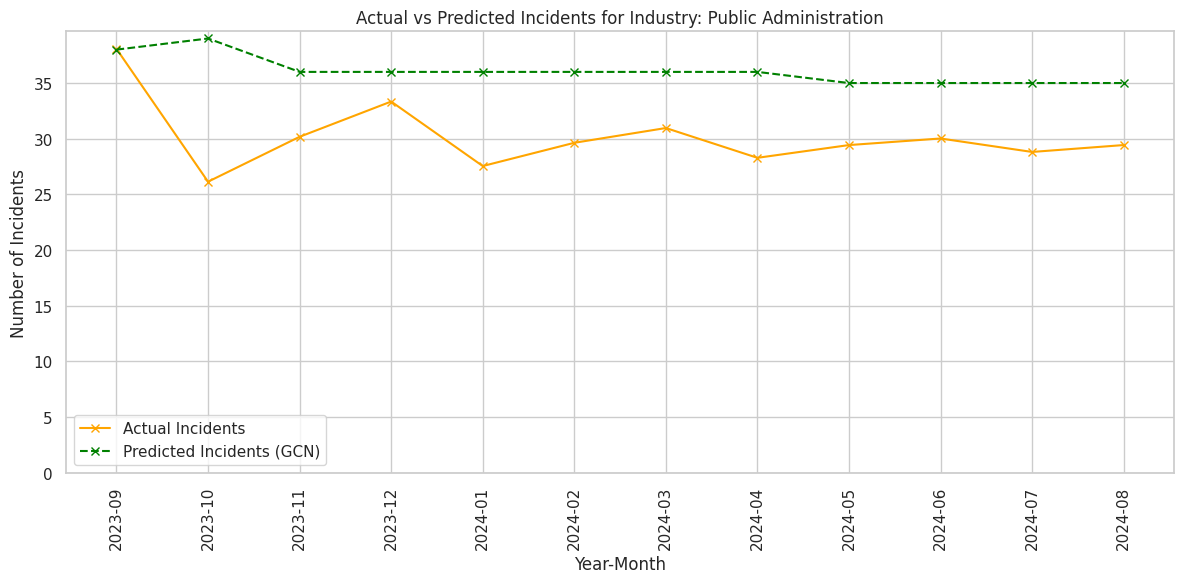

YearMonth  Actual Number of Incidents  Hybrid Forecasted Number of Incidents
  2023-09                          38                                     38
  2023-10                          26                                     39
  2023-11                          30                                     36
  2023-12                          33                                     36
  2024-01                          27                                     36
  2024-02                          29                                     36
  2024-03                          30                                     36
  2024-04                          28                                     36
  2024-05                          29                                     35
  2024-06                          30                                     35
  2024-07                          28                                     35
  2024-08                          29                                     35

<ipython-input-4-369554e4822d>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_data['YearMonth'].max().start_time, periods=future_steps + 1, freq='M')[1:]
<ipython-input-4-369554e4822d>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Number of Incidents'].fillna(merged_data['ARIMA_Predicted'], inplace=True)


Epoch 10/300, Loss: 4.0636
Epoch 20/300, Loss: 3.0777
Epoch 30/300, Loss: 2.1450
Epoch 40/300, Loss: 1.7845
Epoch 50/300, Loss: 1.8563
Epoch 60/300, Loss: 1.5526
Early stopping at epoch 69
Test MAE: 6.18
Test MSE: 41.54
Test MAPE: 51.92%


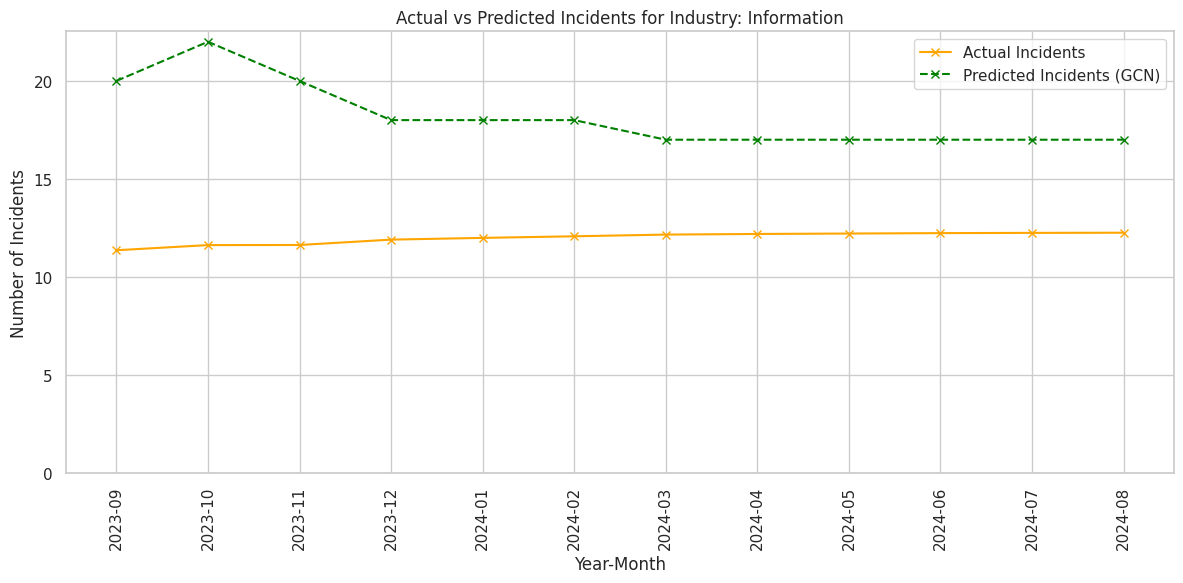

YearMonth  Actual Number of Incidents  Hybrid Forecasted Number of Incidents
  2023-09                          11                                     20
  2023-10                          11                                     22
  2023-11                          11                                     20
  2023-12                          11                                     18
  2024-01                          11                                     18
  2024-02                          12                                     18
  2024-03                          12                                     17
  2024-04                          12                                     17
  2024-05                          12                                     17
  2024-06                          12                                     17
  2024-07                          12                                     17
  2024-08                          12                                     17

<ipython-input-4-369554e4822d>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_data['YearMonth'].max().start_time, periods=future_steps + 1, freq='M')[1:]
<ipython-input-4-369554e4822d>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Number of Incidents'].fillna(merged_data['ARIMA_Predicted'], inplace=True)


Epoch 10/300, Loss: 1.0558
Epoch 20/300, Loss: 0.9093
Epoch 30/300, Loss: 0.8180
Early stopping at epoch 32
Test MAE: 2.45
Test MSE: 7.86
Test MAPE: 7.29%


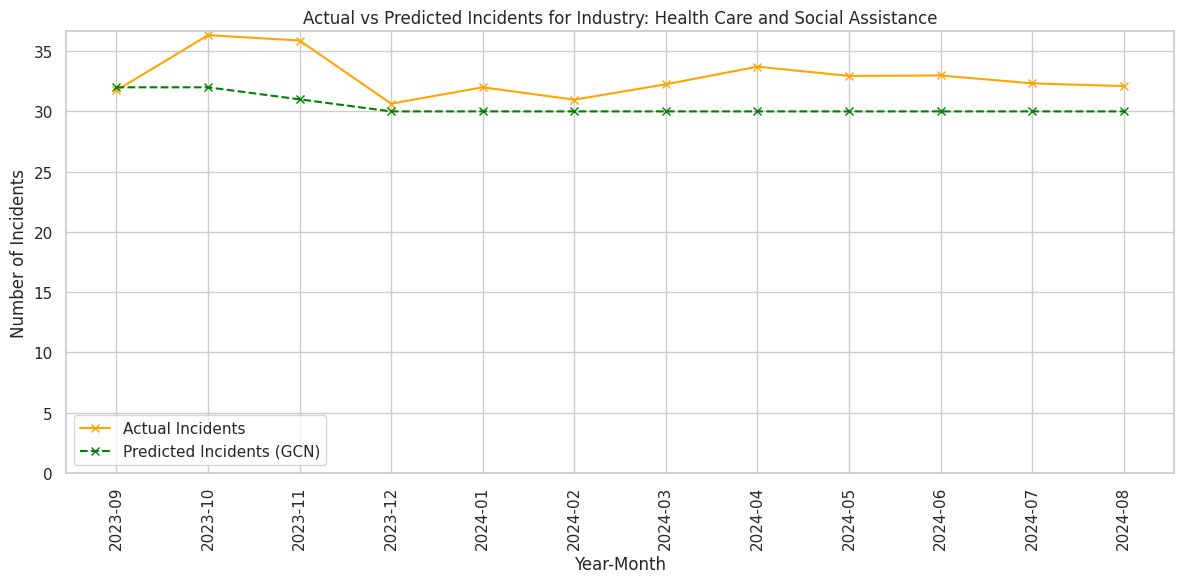

YearMonth  Actual Number of Incidents  Hybrid Forecasted Number of Incidents
  2023-09                          31                                     32
  2023-10                          36                                     32
  2023-11                          35                                     31
  2023-12                          30                                     30
  2024-01                          32                                     30
  2024-02                          30                                     30
  2024-03                          32                                     30
  2024-04                          33                                     30
  2024-05                          32                                     30
  2024-06                          32                                     30
  2024-07                          32                                     30
  2024-08                          32                                     30

<ipython-input-4-369554e4822d>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_data['YearMonth'].max().start_time, periods=future_steps + 1, freq='M')[1:]
<ipython-input-4-369554e4822d>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Number of Incidents'].fillna(merged_data['ARIMA_Predicted'], inplace=True)


Epoch 10/300, Loss: 2.0395
Epoch 20/300, Loss: 1.0738
Epoch 30/300, Loss: 1.1944
Early stopping at epoch 30
Test MAE: 4.43
Test MSE: 23.56
Test MAPE: 34.29%


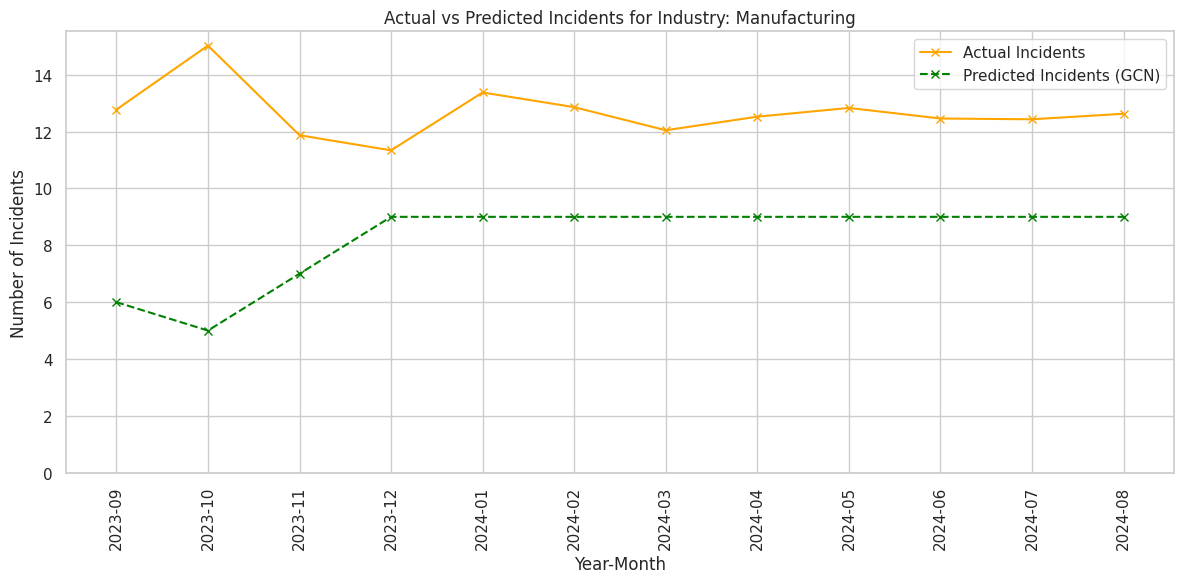

YearMonth  Actual Number of Incidents  Hybrid Forecasted Number of Incidents
  2023-09                          12                                      6
  2023-10                          15                                      5
  2023-11                          11                                      7
  2023-12                          11                                      9
  2024-01                          13                                      9
  2024-02                          12                                      9
  2024-03                          12                                      9
  2024-04                          12                                      9
  2024-05                          12                                      9
  2024-06                          12                                      9
  2024-07                          12                                      9
  2024-08                          12                                      9

<ipython-input-4-369554e4822d>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_data['YearMonth'].max().start_time, periods=future_steps + 1, freq='M')[1:]
<ipython-input-4-369554e4822d>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Number of Incidents'].fillna(merged_data['ARIMA_Predicted'], inplace=True)


Epoch 10/300, Loss: 3.4828
Epoch 20/300, Loss: 2.8743
Epoch 30/300, Loss: 1.7359
Epoch 40/300, Loss: 1.9284
Epoch 50/300, Loss: 1.5583
Epoch 60/300, Loss: 1.2844
Epoch 70/300, Loss: 1.3445
Epoch 80/300, Loss: 0.8815
Epoch 90/300, Loss: 1.2983
Early stopping at epoch 90
Test MAE: 0.93
Test MSE: 1.15
Test MAPE: 21.07%


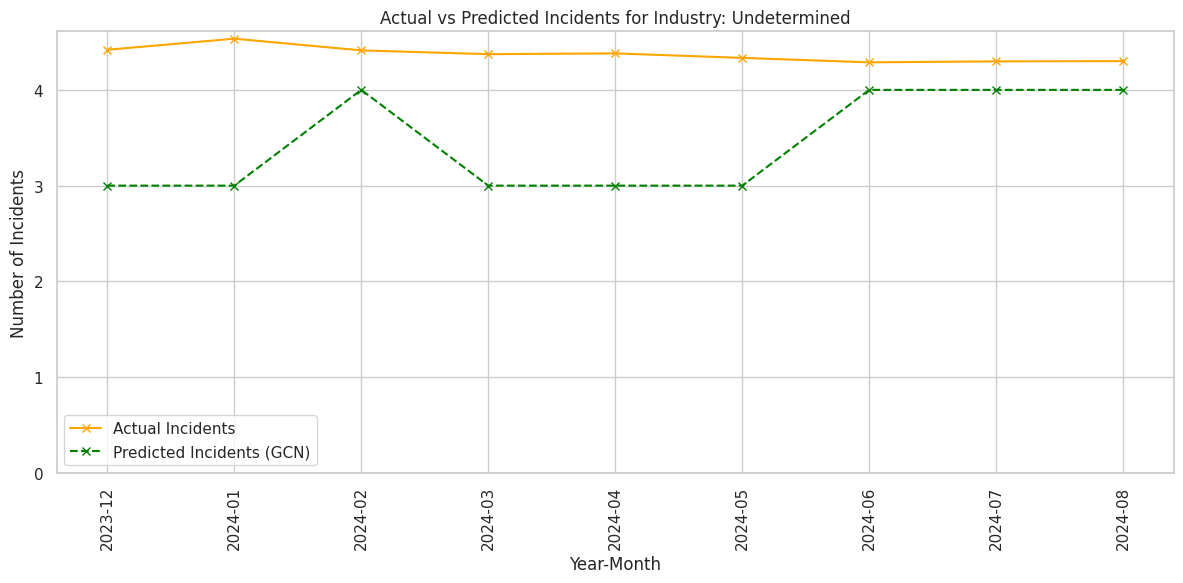

YearMonth  Actual Number of Incidents  Hybrid Forecasted Number of Incidents
  2023-12                           4                                      3
  2024-01                           4                                      3
  2024-02                           4                                      4
  2024-03                           4                                      3
  2024-04                           4                                      3
  2024-05                           4                                      3
  2024-06                           4                                      4
  2024-07                           4                                      4
  2024-08                           4                                      4

Forecasting for Industry: Professional, Scientific, and Technical Services


<ipython-input-4-369554e4822d>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_data['YearMonth'].max().start_time, periods=future_steps + 1, freq='M')[1:]
<ipython-input-4-369554e4822d>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Number of Incidents'].fillna(merged_data['ARIMA_Predicted'], inplace=True)


Epoch 10/300, Loss: 1.9866
Epoch 20/300, Loss: 1.4508
Epoch 30/300, Loss: 1.0842
Epoch 40/300, Loss: 0.7966
Early stopping at epoch 42
Test MAE: 2.72
Test MSE: 10.46
Test MAPE: 12.02%


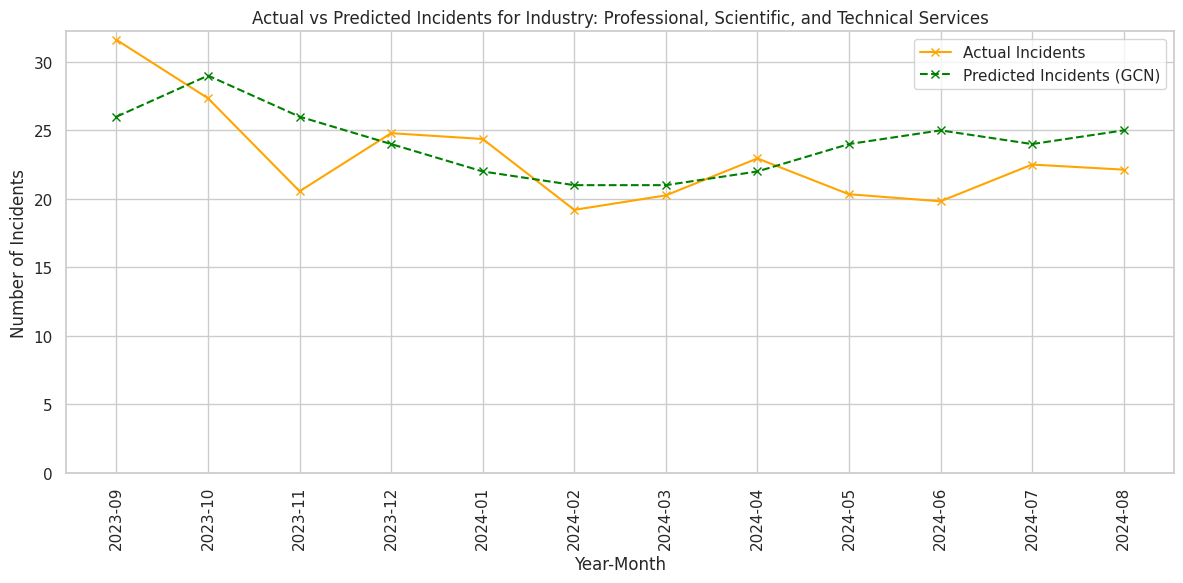

YearMonth  Actual Number of Incidents  Hybrid Forecasted Number of Incidents
  2023-09                          31                                     26
  2023-10                          27                                     29
  2023-11                          20                                     26
  2023-12                          24                                     24
  2024-01                          24                                     22
  2024-02                          19                                     21
  2024-03                          20                                     21
  2024-04                          22                                     22
  2024-05                          20                                     24
  2024-06                          19                                     25
  2024-07                          22                                     24
  2024-08                          22                                     25

<ipython-input-4-369554e4822d>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_data['YearMonth'].max().start_time, periods=future_steps + 1, freq='M')[1:]
<ipython-input-4-369554e4822d>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Number of Incidents'].fillna(merged_data['ARIMA_Predicted'], inplace=True)


Epoch 10/300, Loss: 1.9517
Epoch 20/300, Loss: 1.6661
Epoch 30/300, Loss: 0.9728
Epoch 40/300, Loss: 1.1290
Epoch 50/300, Loss: 0.4885
Epoch 60/300, Loss: 0.9214
Early stopping at epoch 60
Test MAE: 4.19
Test MSE: 39.05
Test MAPE: 13.53%


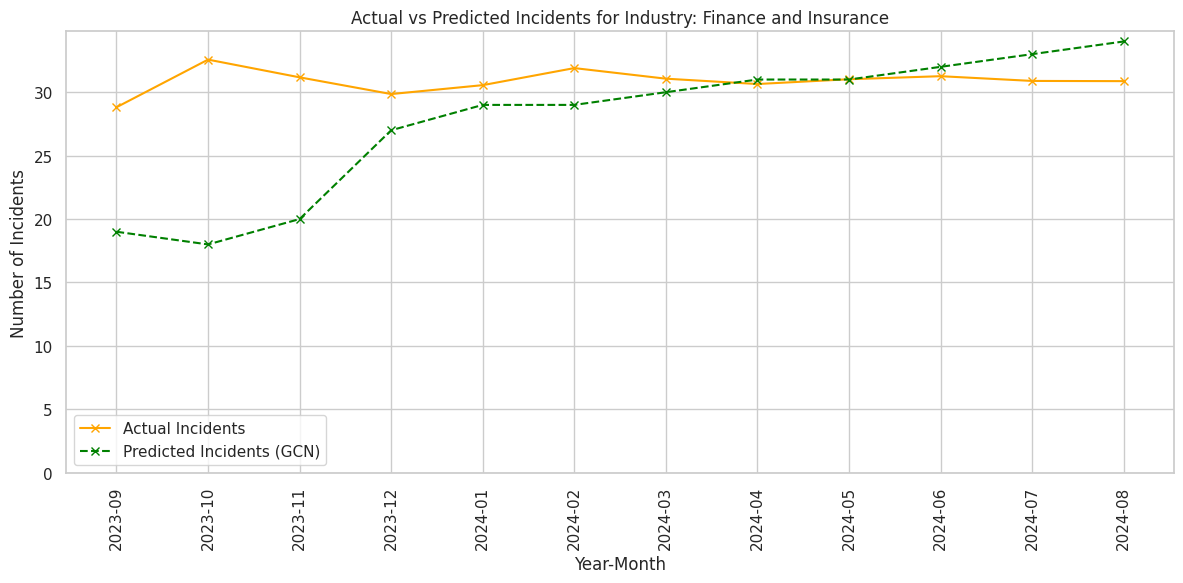

YearMonth  Actual Number of Incidents  Hybrid Forecasted Number of Incidents
  2023-09                          28                                     19
  2023-10                          32                                     18
  2023-11                          31                                     20
  2023-12                          29                                     27
  2024-01                          30                                     29
  2024-02                          31                                     29
  2024-03                          31                                     30
  2024-04                          30                                     31
  2024-05                          31                                     31
  2024-06                          31                                     32
  2024-07                          30                                     33
  2024-08                          30                                     34

<ipython-input-4-369554e4822d>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_data['YearMonth'].max().start_time, periods=future_steps + 1, freq='M')[1:]
<ipython-input-4-369554e4822d>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Number of Incidents'].fillna(merged_data['ARIMA_Predicted'], inplace=True)


Epoch 10/300, Loss: 2.4270
Epoch 20/300, Loss: 1.5937
Epoch 30/300, Loss: 1.5315
Epoch 40/300, Loss: 1.2093
Epoch 50/300, Loss: 1.0302
Epoch 60/300, Loss: 0.8751
Epoch 70/300, Loss: 0.8104
Early stopping at epoch 78
Test MAE: 7.56
Test MSE: 70.26
Test MAPE: 41.90%


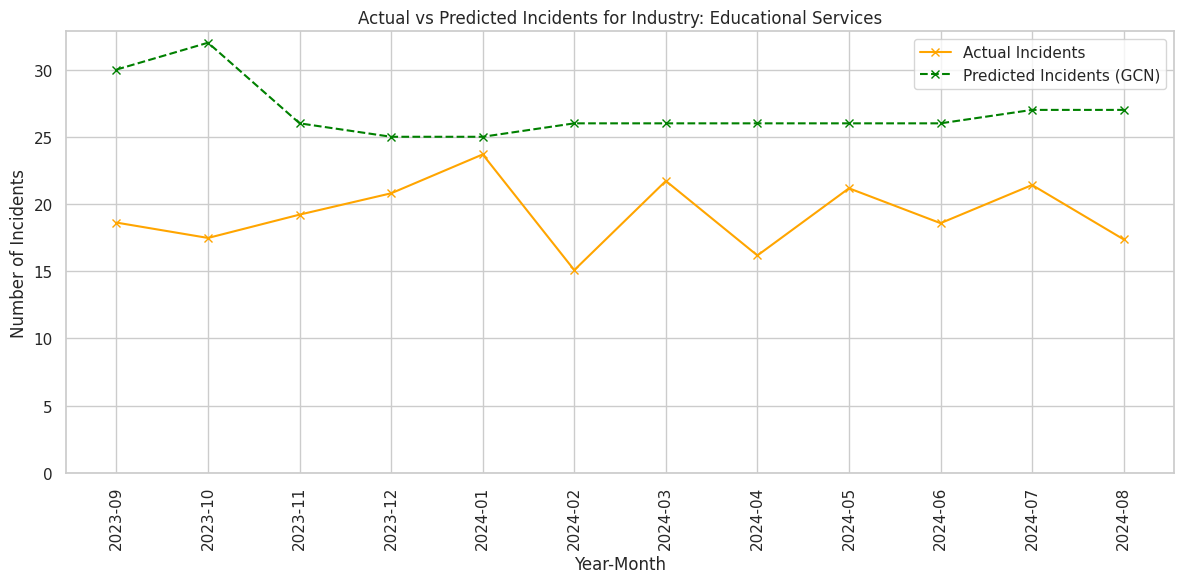

YearMonth  Actual Number of Incidents  Hybrid Forecasted Number of Incidents
  2023-09                          18                                     30
  2023-10                          17                                     32
  2023-11                          19                                     26
  2023-12                          20                                     25
  2024-01                          23                                     25
  2024-02                          15                                     26
  2024-03                          21                                     26
  2024-04                          16                                     26
  2024-05                          21                                     26
  2024-06                          18                                     26
  2024-07                          21                                     27
  2024-08                          17                                     27

<ipython-input-4-369554e4822d>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_data['YearMonth'].max().start_time, periods=future_steps + 1, freq='M')[1:]
<ipython-input-4-369554e4822d>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Number of Incidents'].fillna(merged_data['ARIMA_Predicted'], inplace=True)


Epoch 10/300, Loss: 1.7001
Epoch 20/300, Loss: 1.3552
Early stopping at epoch 26
Test MAE: 0.63
Test MSE: 0.63
Test MAPE: 10.93%


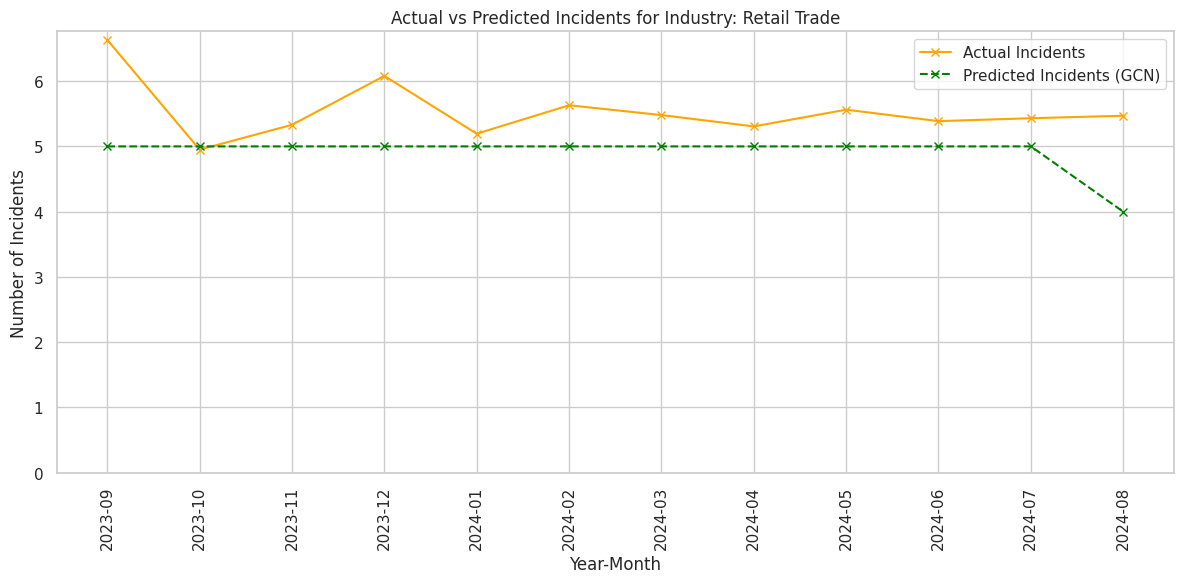

YearMonth  Actual Number of Incidents  Hybrid Forecasted Number of Incidents
  2023-09                           6                                      5
  2023-10                           4                                      5
  2023-11                           5                                      5
  2023-12                           6                                      5
  2024-01                           5                                      5
  2024-02                           5                                      5
  2024-03                           5                                      5
  2024-04                           5                                      5
  2024-05                           5                                      5
  2024-06                           5                                      5
  2024-07                           5                                      5
  2024-08                           5                                      4

<ipython-input-4-369554e4822d>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_data['YearMonth'].max().start_time, periods=future_steps + 1, freq='M')[1:]
<ipython-input-4-369554e4822d>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Number of Incidents'].fillna(merged_data['ARIMA_Predicted'], inplace=True)


Epoch 10/300, Loss: 1.8333
Epoch 20/300, Loss: 1.4038
Epoch 30/300, Loss: 1.0837
Epoch 40/300, Loss: 1.0185
Epoch 50/300, Loss: 0.9463
Early stopping at epoch 51
Test MAE: 0.85
Test MSE: 0.91
Test MAPE: 22.15%


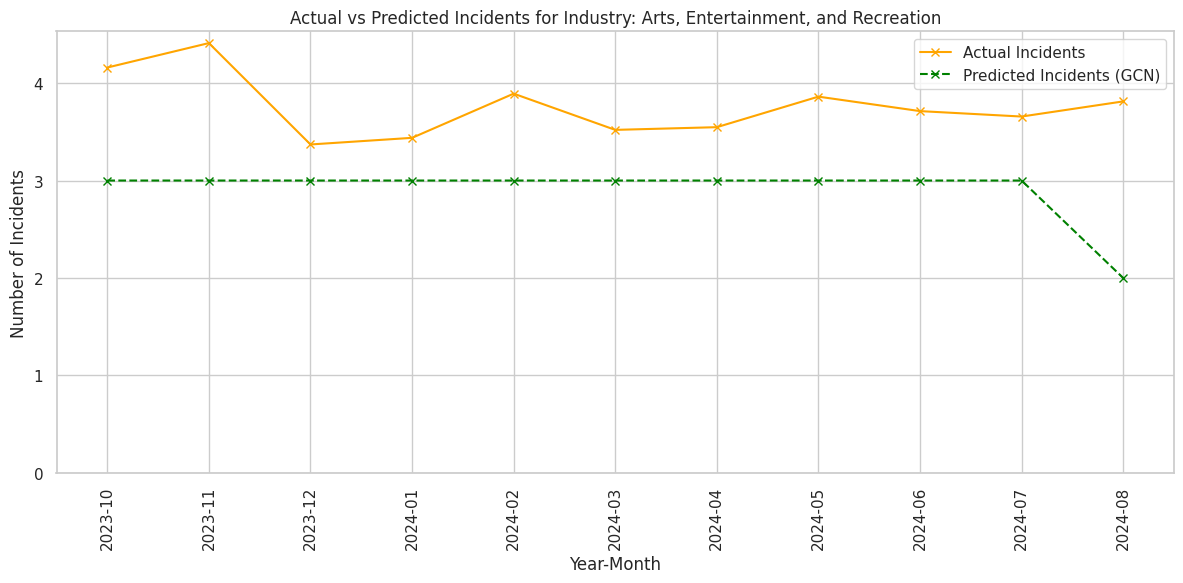

YearMonth  Actual Number of Incidents  Hybrid Forecasted Number of Incidents
  2023-10                           4                                      3
  2023-11                           4                                      3
  2023-12                           3                                      3
  2024-01                           3                                      3
  2024-02                           3                                      3
  2024-03                           3                                      3
  2024-04                           3                                      3
  2024-05                           3                                      3
  2024-06                           3                                      3
  2024-07                           3                                      3
  2024-08                           3                                      2

Forecasting for Industry: Utilities


<ipython-input-4-369554e4822d>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_data['YearMonth'].max().start_time, periods=future_steps + 1, freq='M')[1:]
<ipython-input-4-369554e4822d>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Number of Incidents'].fillna(merged_data['ARIMA_Predicted'], inplace=True)


Epoch 10/300, Loss: 3.9355
Epoch 20/300, Loss: 1.2843
Epoch 30/300, Loss: 1.4663
Early stopping at epoch 30
Test MAE: 1.40
Test MSE: 2.43
Test MAPE: 28.86%


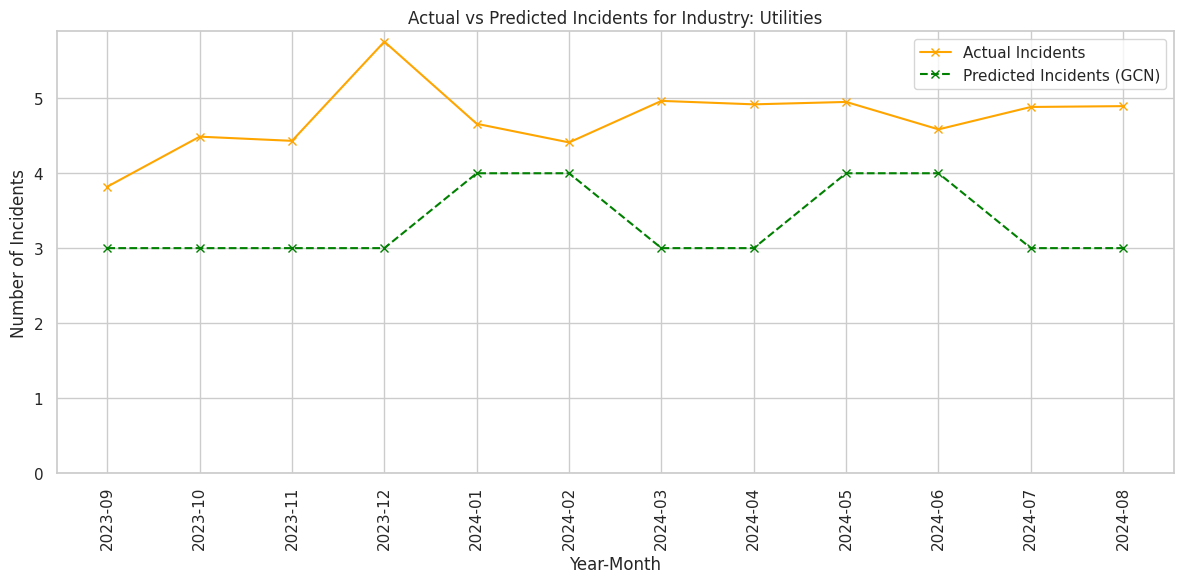

YearMonth  Actual Number of Incidents  Hybrid Forecasted Number of Incidents
  2023-09                           3                                      3
  2023-10                           4                                      3
  2023-11                           4                                      3
  2023-12                           5                                      3
  2024-01                           4                                      4
  2024-02                           4                                      4
  2024-03                           4                                      3
  2024-04                           4                                      3
  2024-05                           4                                      4
  2024-06                           4                                      4
  2024-07                           4                                      3
  2024-08                           4                                      3

<ipython-input-4-369554e4822d>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_data['YearMonth'].max().start_time, periods=future_steps + 1, freq='M')[1:]
<ipython-input-4-369554e4822d>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Number of Incidents'].fillna(merged_data['ARIMA_Predicted'], inplace=True)


Epoch 10/300, Loss: 1.7913
Epoch 20/300, Loss: 1.4362
Epoch 30/300, Loss: 1.0762
Epoch 40/300, Loss: 0.8865
Epoch 50/300, Loss: 0.6512
Epoch 60/300, Loss: 0.6375
Epoch 70/300, Loss: 0.7940
Early stopping at epoch 77
Test MAE: 2.97
Test MSE: 9.30
Test MAPE: 51.44%


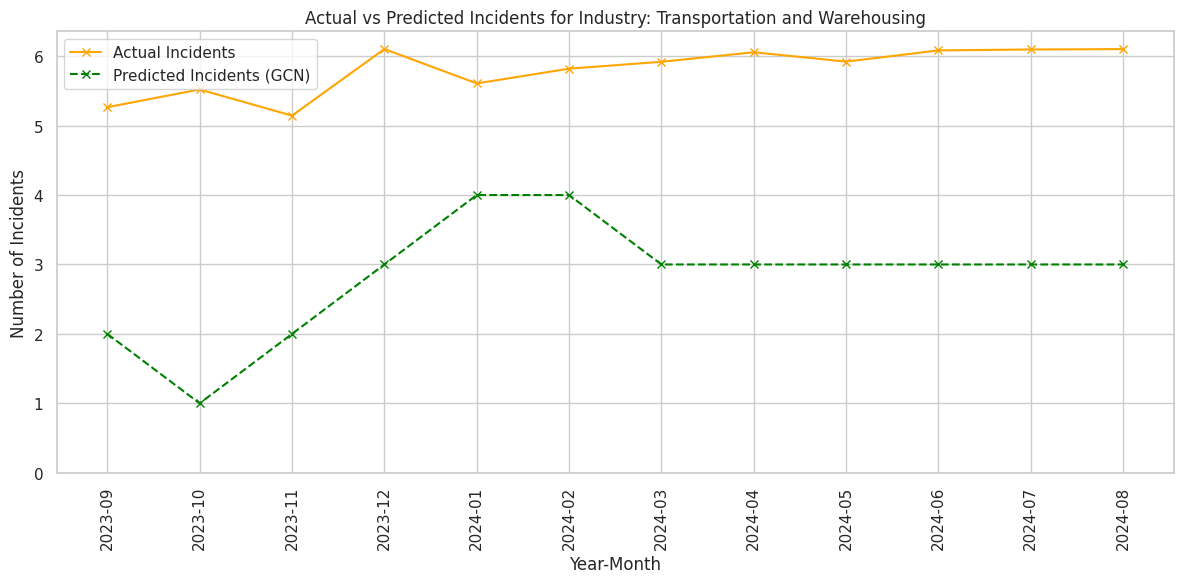

YearMonth  Actual Number of Incidents  Hybrid Forecasted Number of Incidents
  2023-09                           5                                      2
  2023-10                           5                                      1
  2023-11                           5                                      2
  2023-12                           6                                      3
  2024-01                           5                                      4
  2024-02                           5                                      4
  2024-03                           5                                      3
  2024-04                           6                                      3
  2024-05                           5                                      3
  2024-06                           6                                      3
  2024-07                           6                                      3
  2024-08                           6                                      3

<ipython-input-4-369554e4822d>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_data['YearMonth'].max().start_time, periods=future_steps + 1, freq='M')[1:]
<ipython-input-4-369554e4822d>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Number of Incidents'].fillna(merged_data['ARIMA_Predicted'], inplace=True)


Epoch 10/300, Loss: 1.6063
Epoch 20/300, Loss: 1.3038
Epoch 30/300, Loss: 1.2187
Epoch 40/300, Loss: 0.7703
Epoch 50/300, Loss: 0.6957
Early stopping at epoch 54
Test MAE: 0.02
Test MSE: 0.00
Test MAPE: 0.97%


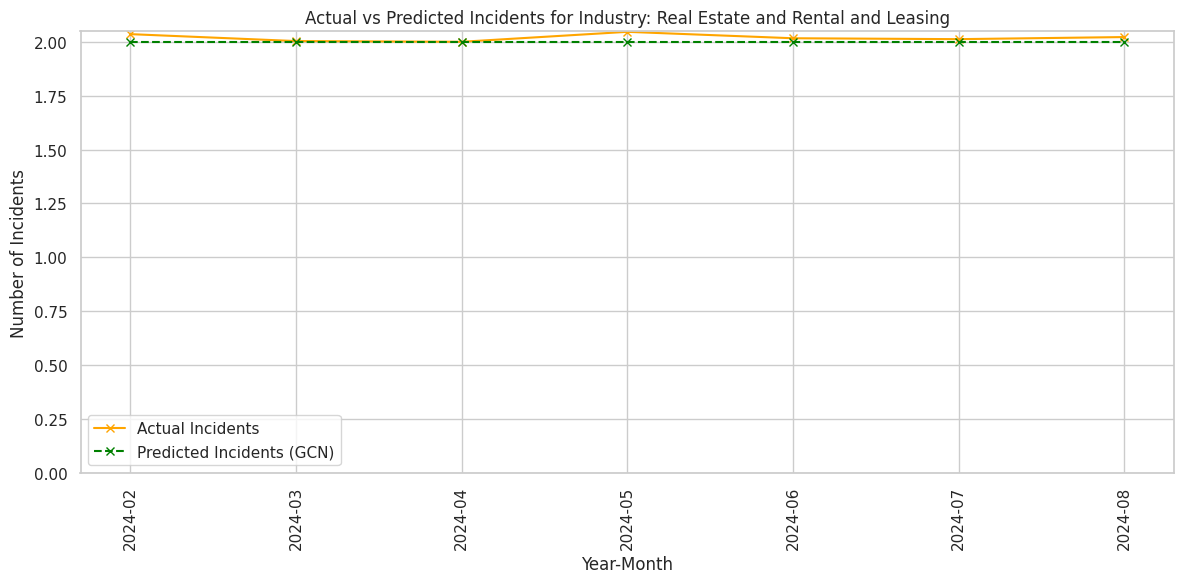

YearMonth  Actual Number of Incidents  Hybrid Forecasted Number of Incidents
  2024-02                           2                                      2
  2024-03                           2                                      2
  2024-04                           2                                      2
  2024-05                           2                                      2
  2024-06                           2                                      2
  2024-07                           2                                      2
  2024-08                           2                                      2

Forecasting for Industry: Construction


<ipython-input-4-369554e4822d>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_data['YearMonth'].max().start_time, periods=future_steps + 1, freq='M')[1:]
<ipython-input-4-369554e4822d>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Number of Incidents'].fillna(merged_data['ARIMA_Predicted'], inplace=True)


Epoch 10/300, Loss: 2.0137
Early stopping at epoch 19
Test MAE: 0.67
Test MSE: 0.45
Test MAPE: 40.22%


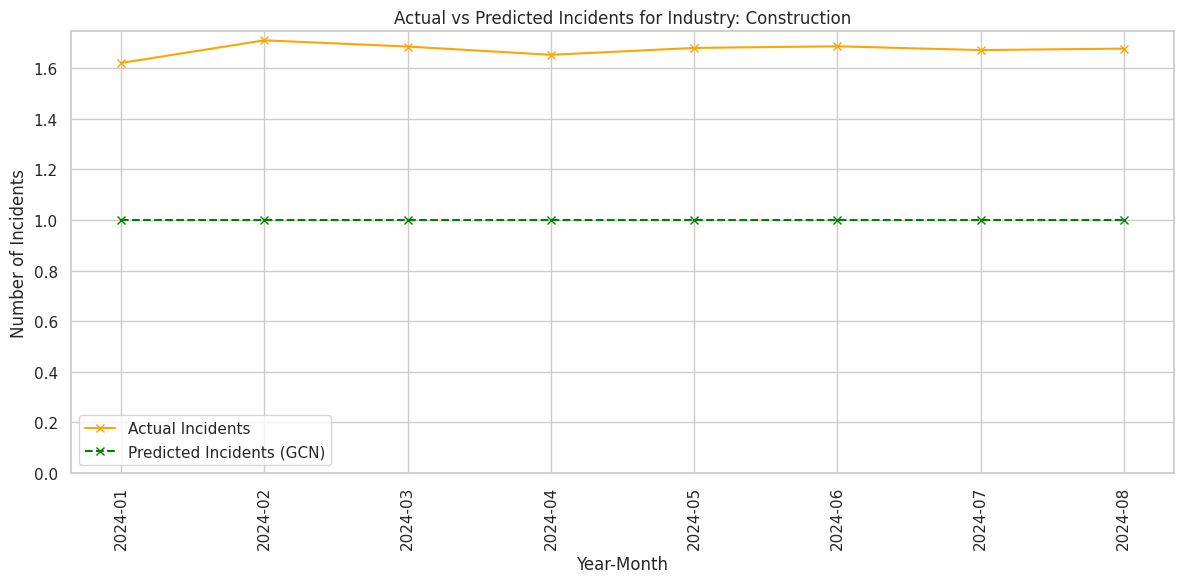

YearMonth  Actual Number of Incidents  Hybrid Forecasted Number of Incidents
  2024-01                           1                                      1
  2024-02                           1                                      1
  2024-03                           1                                      1
  2024-04                           1                                      1
  2024-05                           1                                      1
  2024-06                           1                                      1
  2024-07                           1                                      1
  2024-08                           1                                      1

Forecasting for Industry: Accommodation and Food Services


<ipython-input-4-369554e4822d>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_data['YearMonth'].max().start_time, periods=future_steps + 1, freq='M')[1:]
<ipython-input-4-369554e4822d>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Number of Incidents'].fillna(merged_data['ARIMA_Predicted'], inplace=True)


Epoch 10/300, Loss: 1.4777
Early stopping at epoch 19
Test MAE: 0.11
Test MSE: 0.02
Test MAPE: 3.68%


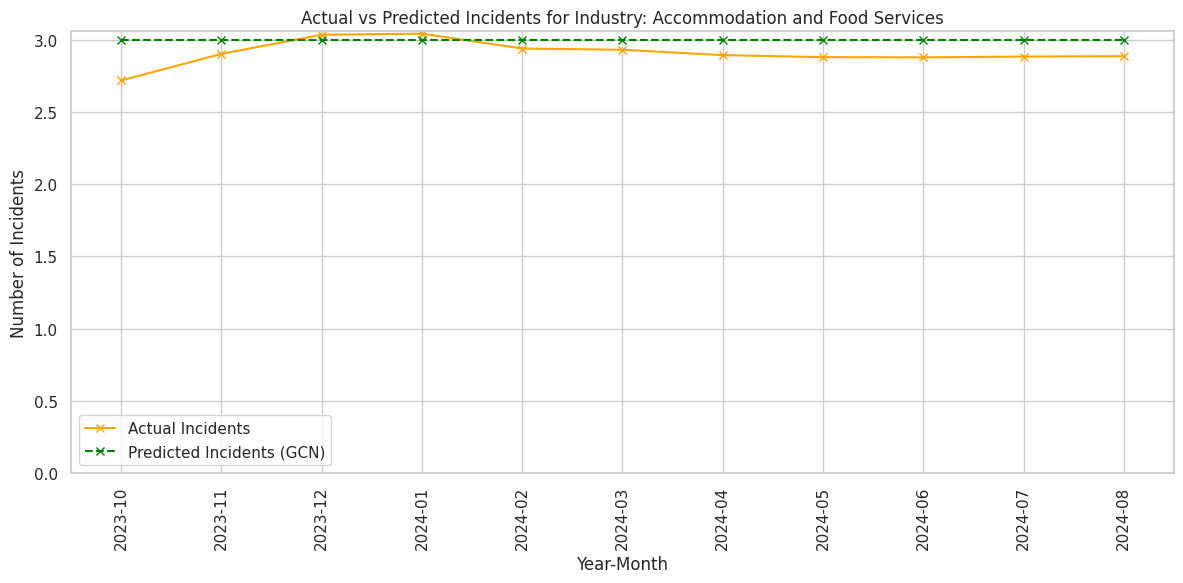

YearMonth  Actual Number of Incidents  Hybrid Forecasted Number of Incidents
  2023-10                           2                                      3
  2023-11                           2                                      3
  2023-12                           3                                      3
  2024-01                           3                                      3
  2024-02                           2                                      3
  2024-03                           2                                      3
  2024-04                           2                                      3
  2024-05                           2                                      3
  2024-06                           2                                      3
  2024-07                           2                                      3
  2024-08                           2                                      3

Forecasting for Industry: Administrative and Support and Waste Management a

<ipython-input-4-369554e4822d>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_data['YearMonth'].max().start_time, periods=future_steps + 1, freq='M')[1:]
<ipython-input-4-369554e4822d>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Number of Incidents'].fillna(merged_data['ARIMA_Predicted'], inplace=True)


Epoch 10/300, Loss: 2.7517
Epoch 20/300, Loss: 2.0426
Early stopping at epoch 25
Test MAE: 0.45
Test MSE: 0.29
Test MAPE: 15.59%


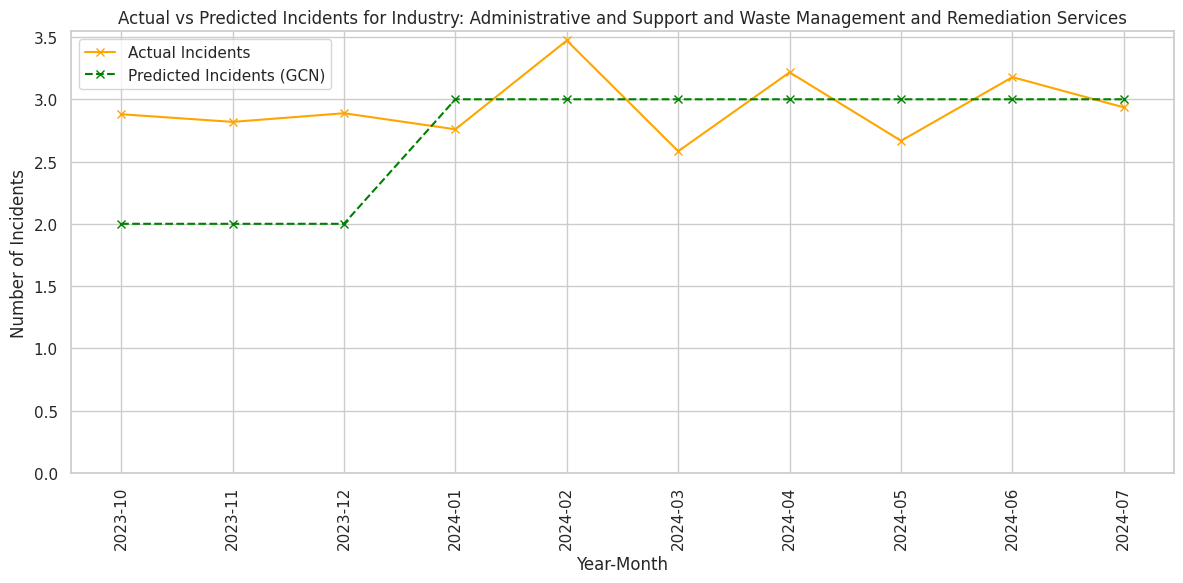

YearMonth  Actual Number of Incidents  Hybrid Forecasted Number of Incidents
  2023-10                           2                                      2
  2023-11                           2                                      2
  2023-12                           2                                      2
  2024-01                           2                                      3
  2024-02                           3                                      3
  2024-03                           2                                      3
  2024-04                           3                                      3
  2024-05                           2                                      3
  2024-06                           3                                      3
  2024-07                           2                                      3

Forecasting for Industry: Mining, Quarrying, and Oil and Gas Extraction


<ipython-input-4-369554e4822d>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_data['YearMonth'].max().start_time, periods=future_steps + 1, freq='M')[1:]
<ipython-input-4-369554e4822d>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Number of Incidents'].fillna(merged_data['ARIMA_Predicted'], inplace=True)


Epoch 10/300, Loss: 1.5762
Early stopping at epoch 17
Test MAE: 0.16
Test MSE: 0.05
Test MAPE: 9.30%


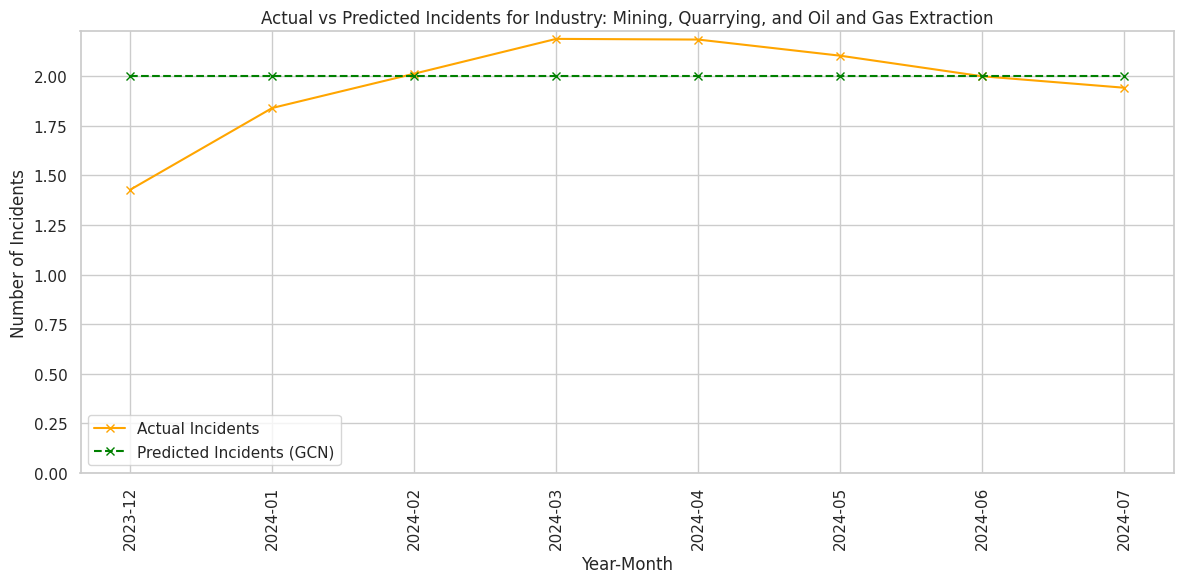

YearMonth  Actual Number of Incidents  Hybrid Forecasted Number of Incidents
  2023-12                           1                                      2
  2024-01                           1                                      2
  2024-02                           2                                      2
  2024-03                           2                                      2
  2024-04                           2                                      2
  2024-05                           2                                      2
  2024-06                           2                                      2
  2024-07                           1                                      2

Forecasting for Industry: Agriculture, Forestry, Fishing and Hunting
Not enough data points for ARIMA in industry: Agriculture, Forestry, Fishing and Hunting. Skipping...

Forecasting for Industry: Wholesale Trade


<ipython-input-4-369554e4822d>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(monthly_data['YearMonth'].max().start_time, periods=future_steps + 1, freq='M')[1:]
<ipython-input-4-369554e4822d>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Number of Incidents'].fillna(merged_data['ARIMA_Predicted'], inplace=True)


Epoch 10/300, Loss: 1.5306
Epoch 20/300, Loss: 1.1746
Epoch 30/300, Loss: 1.2034
Early stopping at epoch 30
Test MAE: 0.46
Test MSE: 0.22
Test MAPE: 18.37%


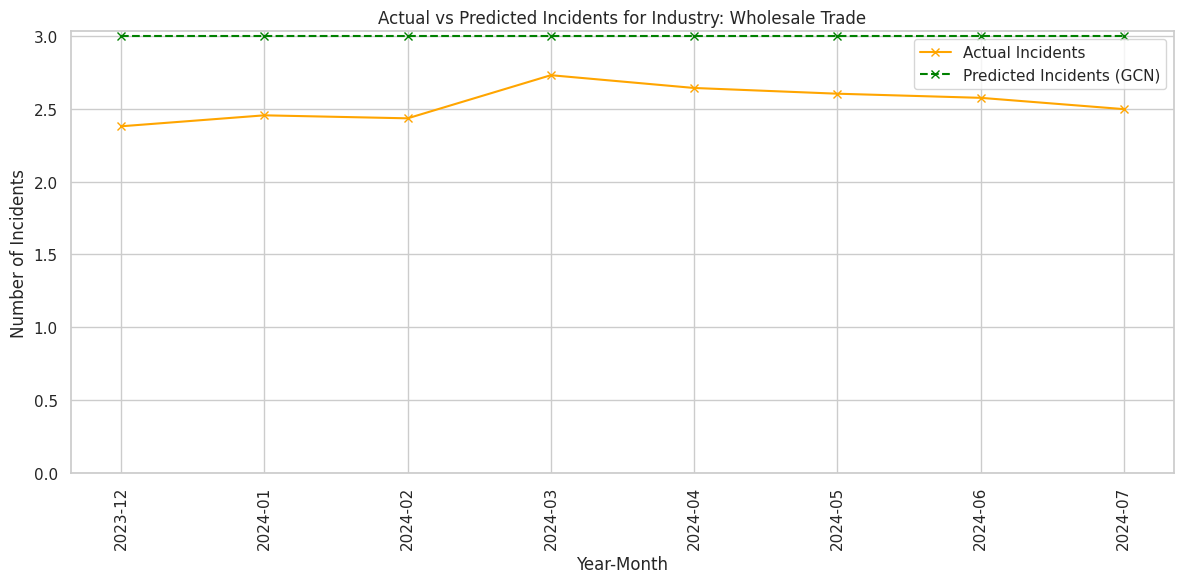

YearMonth  Actual Number of Incidents  Hybrid Forecasted Number of Incidents
  2023-12                           2                                      3
  2024-01                           2                                      3
  2024-02                           2                                      3
  2024-03                           2                                      3
  2024-04                           2                                      3
  2024-05                           2                                      3
  2024-06                           2                                      3
  2024-07                           2                                      3

Forecasting for Industry: Management of Companies and Enterprises
Not enough data points for ARIMA in industry: Management of Companies and Enterprises. Skipping...


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.dropna(subset=['Date'], inplace=True)


if 'Industry' not in data.columns:
    raise ValueError("The dataset must contain an 'Industry' column.")

results_list = []


def hybrid_model_industry(industry_data):

    industry_data.loc[:, 'YearMonth'] = industry_data['Date'].dt.to_period('M')
    monthly_data = industry_data.groupby('YearMonth').size().reset_index(name='Number of Incidents')


    if len(monthly_data) < 20:
        print(f"Not enough data points for ARIMA in industry: {industry_data['Industry'].iloc[0]}. Skipping...")
        return None


    try:
        arima_model = ARIMA(monthly_data['Number of Incidents'], order=(5, 1, 1))
        arima_model_fit = arima_model.fit()


        future_steps = 12
        arima_forecast = arima_model_fit.forecast(steps=future_steps)


        future_dates = pd.date_range(monthly_data['YearMonth'].max().start_time, periods=future_steps + 1, freq='M')[1:]
        arima_forecast_df = pd.DataFrame({'YearMonth': future_dates.to_period('M'), 'ARIMA_Predicted': arima_forecast})


        merged_data = pd.concat([monthly_data, arima_forecast_df], ignore_index=True, sort=False)

        merged_data['Number of Incidents'].fillna(merged_data['ARIMA_Predicted'], inplace=True)


        merged_data['YearMonth_encoded'] = pd.to_datetime(merged_data['YearMonth'].astype(str)).astype(int) / 10**9
        scaler = StandardScaler()
        merged_data['YearMonth_encoded_scaled'] = scaler.fit_transform(merged_data[['YearMonth_encoded']])
        merged_data['Incidents_scaled'] = scaler.fit_transform(merged_data[['Number of Incidents']])


        merged_data['Lag_1'] = merged_data['Incidents_scaled'].shift(1).fillna(0)
        merged_data['Lag_2'] = merged_data['Incidents_scaled'].shift(2).fillna(0)


        node_features = merged_data[['YearMonth_encoded_scaled', 'Incidents_scaled', 'Lag_1', 'Lag_2']].values
        labels = merged_data['Incidents_scaled'].values


        node_features_tensor = torch.tensor(node_features, dtype=torch.float)
        labels_tensor = torch.tensor(labels, dtype=torch.float)


        train_features, test_features, train_labels, test_labels = train_test_split(
            node_features_tensor, labels_tensor, test_size=0.2, shuffle=False)


        class HybridGCN(nn.Module):
            def __init__(self, in_channels, out_channels):
                super(HybridGCN, self).__init__()
                self.conv1 = GCNConv(in_channels, 64)
                self.conv2 = GCNConv(64, 32)
                self.conv3 = GCNConv(32, out_channels)
                self.dropout = nn.Dropout(0.3)
                self.batch_norm = nn.BatchNorm1d(32)

            def forward(self, x, edge_index):
                x = self.conv1(x, edge_index)
                x = torch.relu(x)
                x = self.conv2(x, edge_index)
                x = self.batch_norm(x)
                x = torch.relu(x)
                x = self.dropout(x)
                x = self.conv3(x, edge_index)
                return x


        num_train_nodes = len(train_features)
        train_edge_index = torch.tensor([[i, i + 1] for i in range(num_train_nodes - 1)]).t().contiguous()


        gcn_model = HybridGCN(in_channels=node_features.shape[1], out_channels=1)
        optimizer = optim.AdamW(gcn_model.parameters(), lr=0.0005, weight_decay=1e-4)
        criterion = nn.MSELoss()


        epochs = 300
        early_stopping_patience = 10
        best_loss = float('inf')
        no_improvement = 0

        for epoch in range(epochs):
            gcn_model.train()
            optimizer.zero_grad()
            output = gcn_model(train_features, train_edge_index)
            loss = criterion(output.view(-1), train_labels)
            loss.backward()
            optimizer.step()

            if (epoch + 1) % 10 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}')


            if loss.item() < best_loss:
                best_loss = loss.item()
                no_improvement = 0
            else:
                no_improvement += 1
                if no_improvement >= early_stopping_patience:
                    print(f'Early stopping at epoch {epoch + 1}')
                    break


        gcn_model.eval()
        test_edge_index = torch.tensor([[i, i + 1] for i in range(len(test_features) - 1)]).t().contiguous()

        with torch.no_grad():
            test_output = gcn_model(test_features, test_edge_index)


        test_predicted = scaler.inverse_transform(test_output.detach().numpy().reshape(-1, 1)).flatten()


        test_predicted = np.round(test_predicted).astype(int)


        test_mae = mean_absolute_error(merged_data['Number of Incidents'][-len(test_labels):], test_predicted)
        test_mse = mean_squared_error(merged_data['Number of Incidents'][-len(test_labels):], test_predicted)
        test_mape = mean_absolute_percentage_error(merged_data['Number of Incidents'][-len(test_labels):], test_predicted)

        print(f'Test MAE: {test_mae:.2f}')
        print(f'Test MSE: {test_mse:.2f}')
        print(f'Test MAPE: {test_mape * 100:.2f}%')


        results_df = pd.DataFrame({
            'YearMonth': merged_data['YearMonth'][-len(test_labels):].astype(str),
            'Actual Number of Incidents': merged_data['Number of Incidents'][-len(test_labels):].astype(int),
            'Hybrid Forecasted Number of Incidents': test_predicted
        })


        plt.figure(figsize=(12, 6))
        plt.plot(merged_data['YearMonth'][-len(test_labels):].astype(str),
                 merged_data['Number of Incidents'][-len(test_labels):],
                 label='Actual Incidents', color='orange', marker='x')

        plt.plot(merged_data['YearMonth'][-len(test_labels):].astype(str),
                 test_predicted, label='Predicted Incidents (GCN)', color='green', linestyle='--', marker='x')


        plt.ylim(bottom=0)
        plt.xticks(rotation=90)
        plt.title(f'Actual vs Predicted Incidents for Industry: {industry_data["Industry"].iloc[0]}')
        plt.xlabel('Year-Month')
        plt.ylabel('Number of Incidents')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

        return results_df

    except Exception as e:
        print(f"ARIMA fitting error for industry: {industry_data['Industry'].iloc[0]} - {e}")
        return None


for industry in data['Industry'].dropna().unique():
    industry_data = data[data['Industry'] == industry].copy()


    if industry_data.empty:
        print(f'Skipping industry {industry} as no data is available.')
        continue

    print(f'\nForecasting for Industry: {industry}')
    results_df = hybrid_model_industry(industry_data)
    if results_df is not None:
        results_list.append(results_df)
        print(results_df.to_string(index=False))


